In [22]:
from Bus_Taxi_Enghelab_Environment import EnghelabEnvironment
from UCB_agent import UCBAgent
from epsilon_greedy_agent import EpsilonGreedyAgent
from amalearn.reward import GaussianReward

import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [75]:
rewards = [(i*(-300), -5000+ i*(-300)) for i in range(16)]

In [133]:
action_values = []

for i in range(len(rewards)):
    p = norm.cdf(i,loc = 8, scale = 3)
    action_values.append(p*rewards[i][0] + (1 - p)*rewards[i][1])

opt_act = np.argmax(action_values)
exp_opt_act = action_values[opt_act]
print(opt_act)
action_values

12


[-4980.848097162051,
 -5250.923356856773,
 -5486.249340259104,
 -5661.048238635926,
 -5743.943901370661,
 -5706.7237303427155,
 -5537.5373122653855,
 -5252.793299091182,
 -4900.0,
 -4547.206700908819,
 -4262.4626877346145,
 -4093.2762696572854,
 -4056.0560986293394,
 -4138.951761364074,
 -4313.7506597408965,
 -4549.076643143227]

In [198]:
regret = np.zeros((2001,1))
perc_opt_act = np.zeros((2001,1))
average_rewards = np.zeros((2001,1))

for r in range(30):
    sum_rewards = 0
    opt_act_count = 0
    avg = 0 
    env = EnghelabEnvironment(rewards, '1')
    agent = EpsilonGreedyAgent('1', env, epsilon=0.99,epsilon_decay=0.99,alpha=0.88,beta=0.88,gamma=2.25)
    for t in range(1,2001):
        rew , act, u = agent.take_action()
        
        sum_rewards += rew
        regret[t] += ((t*exp_opt_act - sum_rewards) - regret[t]) / (r+1)
        
        opt_act_count += int(act == opt_act)
        perc_opt_act[t] += ((opt_act_count / t) - perc_opt_act[t]) / (r+1)
        
        avg += (rew - avg) / t
        average_rewards[t] += ( avg - average_rewards[t]) / (r+1)
        
        env.reset()


 arrived'}
1:	action=12
{} -3600 True {'Bus arrived'}
1:	action=12
{} -8600 True {"Bus didn't arrive I went by taxi"}
1:	action=12
{} -3600 True {'Bus arrived'}
1:	action=12
{} -8600 True {"Bus didn't arrive I went by taxi"}
1:	action=12
{} -3600 True {'Bus arrived'}
1:	action=12
{} -3600 True {'Bus arrived'}
1:	action=12
{} -3600 True {'Bus arrived'}
1:	action=12
{} -3600 True {'Bus arrived'}
1:	action=12
{} -3600 True {'Bus arrived'}
1:	action=12
{} -3600 True {'Bus arrived'}
1:	action=12
{} -3600 True {'Bus arrived'}
1:	action=12
{} -3600 True {'Bus arrived'}
1:	action=12
{} -3600 True {'Bus arrived'}
1:	action=12
{} -3600 True {'Bus arrived'}
1:	action=12
{} -3600 True {'Bus arrived'}
1:	action=12
{} -3600 True {'Bus arrived'}
1:	action=12
{} -3600 True {'Bus arrived'}
1:	action=12
{} -3600 True {'Bus arrived'}
1:	action=12
{} -3600 True {'Bus arrived'}
1:	action=12
{} -8600 True {"Bus didn't arrive I went by taxi"}
1:	action=12
{} -3600 True {'Bus arrived'}
1:	action=12
{} -3600 T

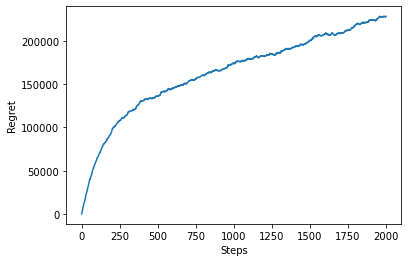

In [199]:
plt.figure()
plt.plot(range(2001),regret)
plt.ylabel('Regret',rotation = 90)
plt.xlabel('Steps')
plt.show()

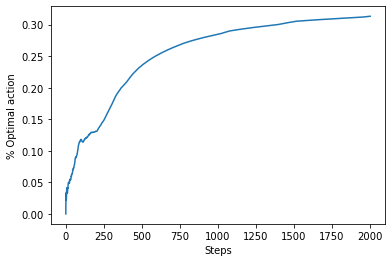

In [200]:
plt.figure()
plt.plot(range(2001),perc_opt_act)
plt.ylabel('% Optimal action',rotation = 90)
plt.xlabel('Steps')
plt.show()

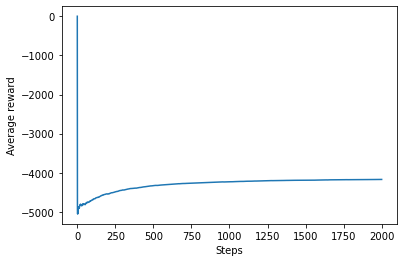

In [201]:
plt.figure()
plt.plot(range(2001),average_rewards)
plt.ylabel('Average reward',rotation = 90)
plt.xlabel('Steps')
plt.show()

# UCB 

In [202]:
regret2 = np.zeros((2001,1))
perc_opt_act2 = np.zeros((2001,1))
average_rewards2 = np.zeros((2001,1))

for r in range(30):
    sum_rewards = 0
    opt_act_count = 0
    avg = 0 
    env = EnghelabEnvironment(rewards, '1')
    agent = UCBAgent('1', env, exploration_degree=3,alpha=0.88,beta=0.88,gamma=2.25)
    for t in range(1,2001):
        rew , act, u = agent.take_action()
        
        sum_rewards += rew
        regret2[t] += ((t*exp_opt_act - sum_rewards) - regret2[t]) / (r+1)
        
        opt_act_count += int(act == opt_act)
        perc_opt_act2[t] += ((opt_act_count / t) - perc_opt_act2[t]) / (r+1)
        
        avg += (rew - avg) / t
        average_rewards2[t] += ( avg - average_rewards2[t]) / (r+1)
        
        env.reset()



{} -3600 True {'Bus arrived'}
1:	action=12
{} -3600 True {'Bus arrived'}
1:	action=12
{} -3600 True {'Bus arrived'}
1:	action=12
{} -3600 True {'Bus arrived'}
1:	action=12
{} -3600 True {'Bus arrived'}
1:	action=12
{} -3600 True {'Bus arrived'}
1:	action=12
{} -3600 True {'Bus arrived'}
1:	action=12
{} -3600 True {'Bus arrived'}
1:	action=12
{} -3600 True {'Bus arrived'}
1:	action=12
{} -3600 True {'Bus arrived'}
1:	action=12
{} -3600 True {'Bus arrived'}
1:	action=12
{} -3600 True {'Bus arrived'}
1:	action=12
{} -3600 True {'Bus arrived'}
1:	action=12
{} -3600 True {'Bus arrived'}
1:	action=12
{} -3600 True {'Bus arrived'}
1:	action=12
{} -3600 True {'Bus arrived'}
1:	action=12
{} -3600 True {'Bus arrived'}
1:	action=12
{} -3600 True {'Bus arrived'}
1:	action=12
{} -3600 True {'Bus arrived'}
1:	action=12
{} -3600 True {'Bus arrived'}
1:	action=12
{} -3600 True {'Bus arrived'}
1:	action=12
{} -3600 True {'Bus arrived'}
1:	action=12
{} -3600 True {'Bus arrived'}
1:	action=12
{} -3600 T

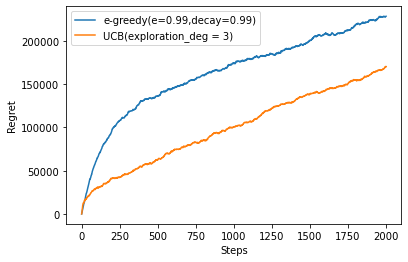

In [203]:
plt.figure()
plt.plot(range(2001),regret)
plt.plot(range(2001),regret2)
plt.ylabel('Regret',rotation = 90)
plt.xlabel('Steps')
plt.legend(loc="best",labels=("e-greedy(e=0.99,decay=0.99)","UCB(exploration_deg = 3)"))
plt.show()

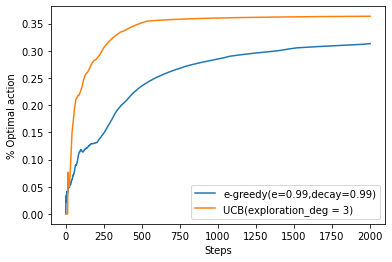

In [204]:
plt.figure()
plt.plot(range(2001),perc_opt_act)
plt.plot(range(2001),perc_opt_act2)
plt.ylabel('% Optimal action',rotation = 90)
plt.xlabel('Steps')
plt.legend(loc="best",labels=("e-greedy(e=0.99,decay=0.99)","UCB(exploration_deg = 3)"))
plt.show()

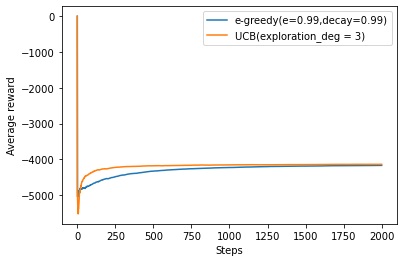

In [205]:
plt.figure()
plt.plot(range(2001),average_rewards)
plt.plot(range(2001),average_rewards2)
plt.ylabel('Average reward',rotation = 90)
plt.xlabel('Steps')
plt.legend(loc="best",labels=("e-greedy(e=0.99,decay=0.99)","UCB(exploration_deg = 3)"))
plt.show()